# **SURVEY LUNG CANCER**

The "Survey Lung Cancer" project uses survey data to predict whether a person has lung cancer or not based on factors like age, gender, lifestyle, and medical history. The goal is to build a machine learning model to classify individuals as having cancer or not.

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Read Data

The code loads a dataset from the CSV file **"survey lung cancer.csv"** into a pandas DataFrame. It then displays the content of the DataFrame to preview the data.

In [ ]:
df=pd.read_csv('/content/survey lung cancer.csv')
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


##Display the first five rows of the Dataframe

In [ ]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


The code df.shape returns the dimensions of the DataFrame df, showing the number of rows and columns. It provides a tuple like (num_rows, num_columns).

In [ ]:
df.shape

(309, 16)

##Slicing

- X = df.iloc[:, 0:15]: This selects all rows (:) and the first 15 columns (0:15) from the DataFrame df and assigns it to X. It contains the features or input data.

- Y = df.iloc[:, -1]: This selects all rows (:) and the last column (-1) from the DataFrame df and assigns it to Y. It contains the target variable or labels for the dataset.

In [ ]:
X=df.iloc[:,0:15] #selects all rows and the first 15 columns
Y=df.iloc[:,-1]   #selects all rows and the last column.

In [ ]:
X

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2


In [ ]:
Y

,LUNG_CANCER
0,YES
1,YES
2,NO
3,NO
4,NO
...,...
304,YES
305,YES
306,YES
307,YES


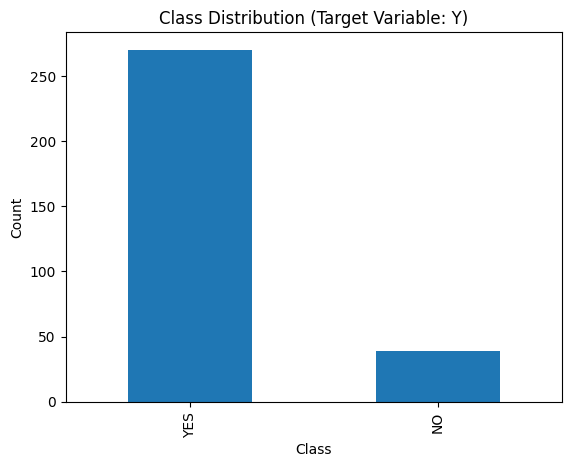

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the class distribution for the target variable Y
Y.value_counts().plot(kind='bar')
plt.title('Class Distribution (Target Variable: Y)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.savefig('target variable.png')
plt.show()


# Check for Missing Values

- **Print(X.isnull().sum()):** This checks for missing values in the dataset X by
counting how many null (missing) values are present in each column.
- **Print(X.dtypes):** This displays the data types of each column in the dataset X, helping to ensure the data is in the correct format for analysi

In [ ]:
print(X.isnull().sum())
print(X.dtypes)

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
dtype: int64
GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
dtype: object


# Encoding

Converts the categorical "GENDER" column in the X DataFrame into numerical values using Label Encoding. The LabelEncoder() from sklearn.preprocessing is used to assign a unique integer to each category (e.g., "Male" = 0, "Female" = 1). This transformation is stored back in the "GENDER" column of X.

In [ ]:
# Convert categorical Gender column to numerical using Label Encoding
label_encoder = LabelEncoder()
X['GENDER'] = label_encoder.fit_transform(X['GENDER'])

**After Label Encoding:**

In [ ]:
X

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2


# Train & Test Split

This code splits the data into training and testing sets, with 80% for training and 20% for testing. The split is done randomly, but the random_state=0 ensures consistent results each time.

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

**Display a pie chart showing the percentage of data used for training and testing, helping you visualize the split.**

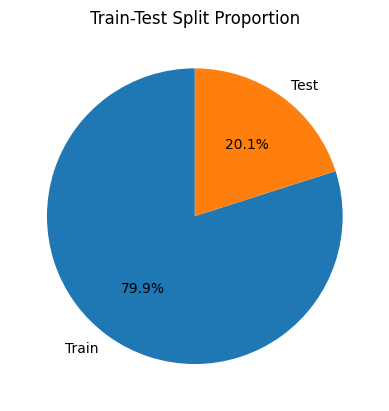

In [ ]:
import matplotlib.pyplot as plt

# Plot the proportion of training and testing data
labels = ['Train', 'Test']
sizes = [len(X_train), len(X_test)]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Train-Test Split Proportion')
plt.savefig('bar.jpg')
plt.show()

In [ ]:
X_train

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
7,0,51,2,2,2,2,1,2,2,1,1,1,2,2,1
45,1,72,2,2,2,2,2,2,1,2,2,2,2,2,2
97,1,59,2,1,1,2,1,1,1,1,2,2,2,1,1
92,1,52,2,1,1,1,2,2,2,2,2,1,1,2,2
198,0,73,2,2,2,1,2,1,2,1,2,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0,64,2,2,2,2,2,2,2,2,1,2,2,2,2
192,0,51,2,2,2,2,2,1,1,1,1,1,1,1,1
117,0,51,2,2,2,2,1,2,2,1,1,1,2,2,1
47,0,64,2,2,1,2,1,2,1,2,2,2,1,2,2


In [ ]:
Y_train

,LUNG_CANCER
7,YES
45,YES
97,YES
92,YES
198,YES
...,...
251,YES
192,YES
117,YES
47,YES


# Model Training: Logistic Regression

Initializes and trains a Logistic Regression model using the training data (X_train and Y_train). The model learns the relationship between the features and the target variable.

In [ ]:
model = LogisticRegression()

# Generate Predictions Using the Trained Model on Test Data

In [ ]:
X_test

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
63,0,68,1,1,2,1,2,1,2,2,2,1,1,2,1
231,1,64,2,2,2,2,1,2,2,1,2,2,2,1,2
167,1,62,1,1,1,1,2,1,2,1,2,2,2,2,2
159,1,68,1,1,2,2,2,1,1,1,2,1,1,1,1
189,0,67,2,2,2,2,1,2,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,1,59,1,2,2,1,1,1,1,1,1,1,1,2,2
250,1,69,2,2,2,2,1,2,2,1,1,1,2,2,1
33,0,67,2,2,2,1,2,1,1,1,1,1,2,2,2
21,0,64,1,2,2,2,1,1,2,2,1,2,1,2,1


In [ ]:
# Make predictions
Y_pred = model.predict(X_test)

In [ ]:
Y_pred

array(['YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO',
       'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO', 'NO', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES'], dtype=object)

In [ ]:
Y_test

,LUNG_CANCER
63,YES
231,YES
167,YES
159,NO
189,YES
...,...
34,NO
250,YES
33,YES
21,YES


# Logistic Regression Model Accuracy Calculation

In [ ]:
# Evaluate the model
accuracy_lr = accuracy_score(Y_test, Y_pred)
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")



Logistic Regression Accuracy: 0.90


### Precision score: the ratio of correctly predicted positive observations to the total predicted positives

In [ ]:

print("Precision:", precision_score(Y_test, Y_pred, average='weighted'))

Precision: 0.8982334869431644


### Recall score: the ratio of correctly predicted positives to all observations in the actual class

In [ ]:
print("Recall:", recall_score(Y_test, Y_pred, average='weighted'))

Recall: 0.9032258064516129


### F1 Score: the harmonic mean of precision and recall, balancing both metrics

In [ ]:
print("F1 Score:", f1_score(Y_test, Y_pred, average='weighted'))

F1 Score: 0.892921146953405


### The **confusion matrix** tells you how many predictions were correct or incorrect:


1. **True Positive (TP):** Correctly
 predicted "Real" articles.
2.**True Negative (TN):**  Correctly predicted "Fake" articles.
3. **False Positive (FP):** Incorrectly predicted "Real" for a "Fake" article.
4. **False Negative (FN):** Incorrectly predicted "Fake" for a "Real" article.


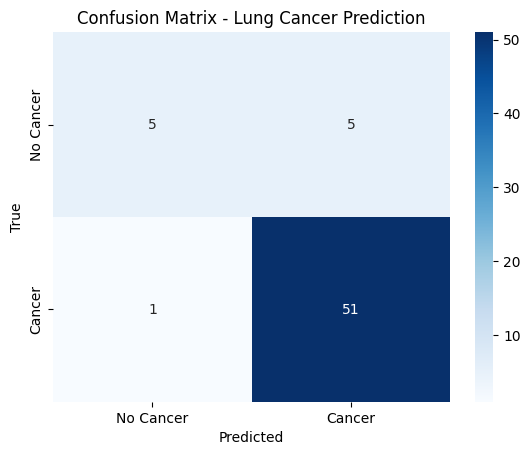

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
import seaborn as sns

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
plt.title('Confusion Matrix - Lung Cancer Prediction')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusion matrix.png')
plt.show()

### Classification Report: detailed metrics for each class, including precision, recall, F1 score, and support

In [ ]:
print("Classification Report:\n", classification_report(Y_test, Y_pred))

Classification Report:
               precision    recall  f1-score   support

          NO       0.83      0.50      0.62        10
         YES       0.91      0.98      0.94        52

    accuracy                           0.90        62
   macro avg       0.87      0.74      0.78        62
weighted avg       0.90      0.90      0.89        62



### Generate the classification report

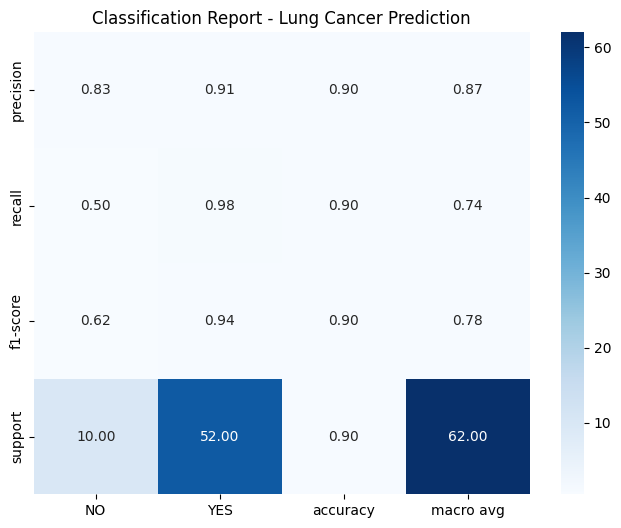

In [ ]:
report = classification_report(Y_test, Y_pred, output_dict=True)

# Convert the classification report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Plot the classification report as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='Blues', fmt='.2f', cbar=True)
plt.title('Classification Report - Lung Cancer Prediction')
plt.show()

# Model Training: Decision Tree

This code trains a Decision Tree model and tests its performance on the data, showing accuracy and other important metrics. It creates a classification report with precision, recall, and F1-score for each class, then visualizes these metrics as a heatmap. The heatmap makes it easy to see how well the model is doing for each class.

In [ ]:
# Train the Decision Tree model
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, Y_train)

# Make predictions
Y_pred_dt = model_dt.predict(X_test)

# Evaluate accuracy
accuracy_dt = accuracy_score(Y_test, Y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")

Decision Tree Accuracy: 0.90


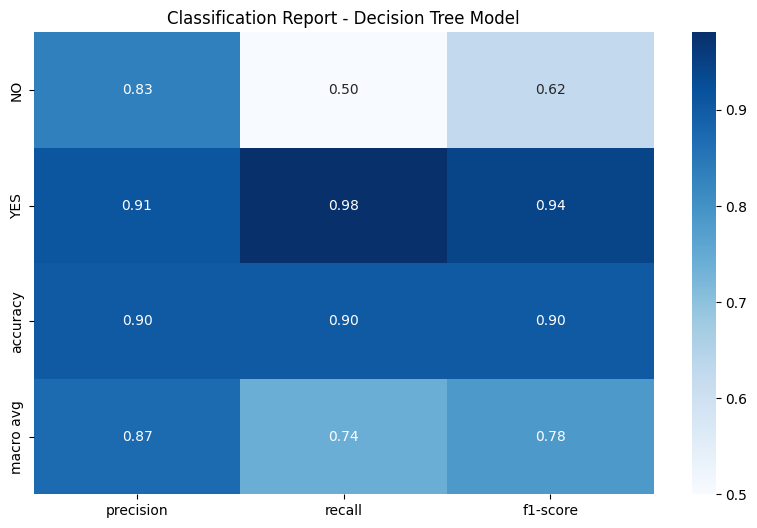

In [ ]:
# Print precision, recall, f1-score, and support report
report = classification_report(Y_test, Y_pred_dt)

# Plot the classification report as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :3], annot=True, cmap='Blues', fmt='.2f', cbar=True)
plt.title('Classification Report - Decision Tree Model')
plt.show()

## Confusion Matrix

The confusion matrix helps you see where the model makes correct and incorrect predictions, making it easier to understand its strengths and weaknesses across different classes.

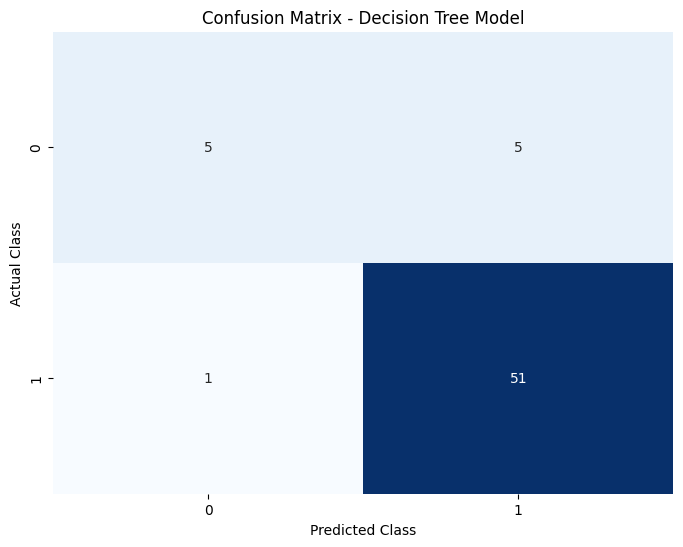

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred_dt)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix - Decision Tree Model')
plt.show()

# Model Training: Random Forest

In [ ]:
# Train the Random Forest model
model_rf = RandomForestClassifier()
model_rf.fit(X_train, Y_train)

# Make predictions
Y_pred_rf = model_rf.predict(X_test)

# Evaluate accuracy
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

Random Forest Accuracy: 0.92


## heatmap plotting

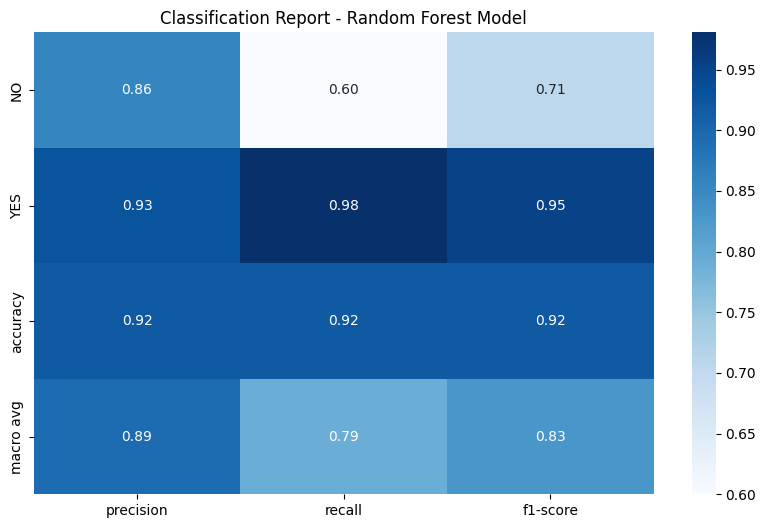

In [ ]:
# Print precision, recall, f1-score, and support report
report = classification_report(Y_test, Y_pred_rf, output_dict=True)

# Convert the report to a DataFrame for heatmap plotting
report_df = pd.DataFrame(report).transpose()

# Plot the classification report as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :3], annot=True, cmap='Blues', fmt='.2f', cbar=True)
plt.title('Classification Report - Random Forest Model')
plt.show()

## Confusion Matrix

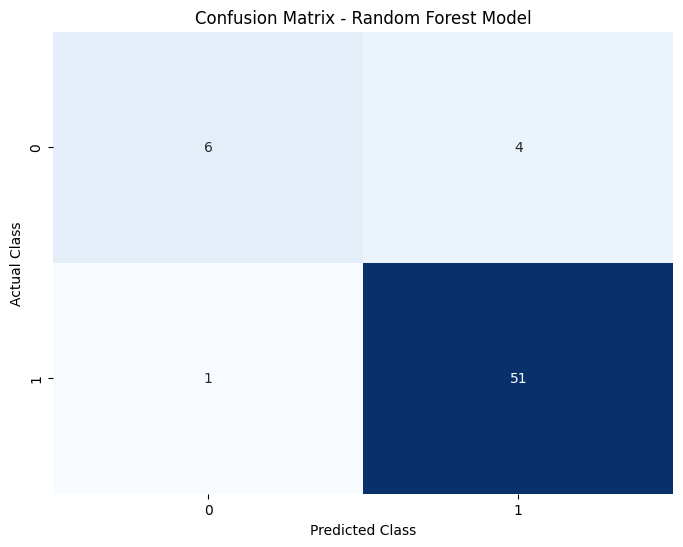

In [ ]:
# Plot the confusion matrix as a heatmap
cm = confusion_matrix(Y_test, Y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix - Random Forest Model')
plt.show()

# Model Training: Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
# Train the SVM model
model_svm = SVC()
model_svm.fit(X_train, Y_train)

# Make predictions
Y_pred_svm = model_svm.predict(X_test)

# Evaluate accuracy
accuracy_svm = accuracy_score(Y_test, Y_pred_svm)
print(f"Support Vector Machine Accuracy: {accuracy_svm:.2f}")

Support Vector Machine Accuracy: 0.84


## heatmap plotting

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


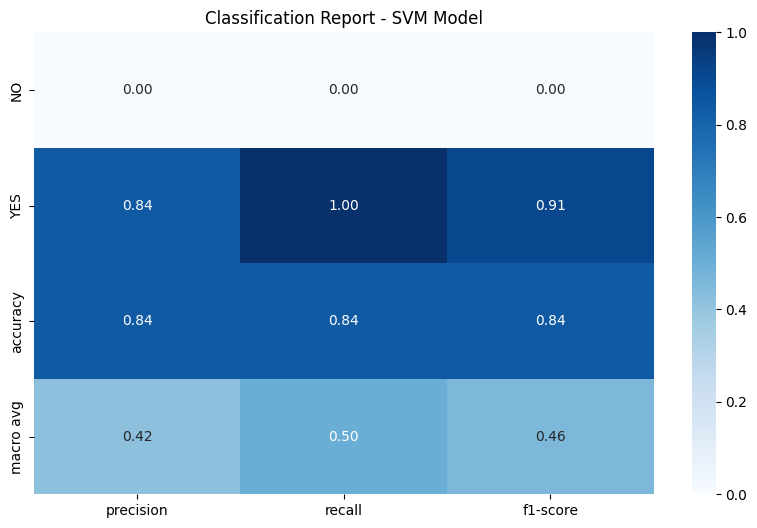

In [ ]:
# Print precision, recall, f1-score, and support report
report = classification_report(Y_test, Y_pred_svm, output_dict=True)


# Convert the report to a DataFrame for heatmap plotting
report_df = pd.DataFrame(report).transpose()

# Plot the classification report as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :3], annot=True, cmap='Blues', fmt='.2f', cbar=True)
plt.title('Classification Report - SVM Model')
plt.show()


## Confusion Matrix

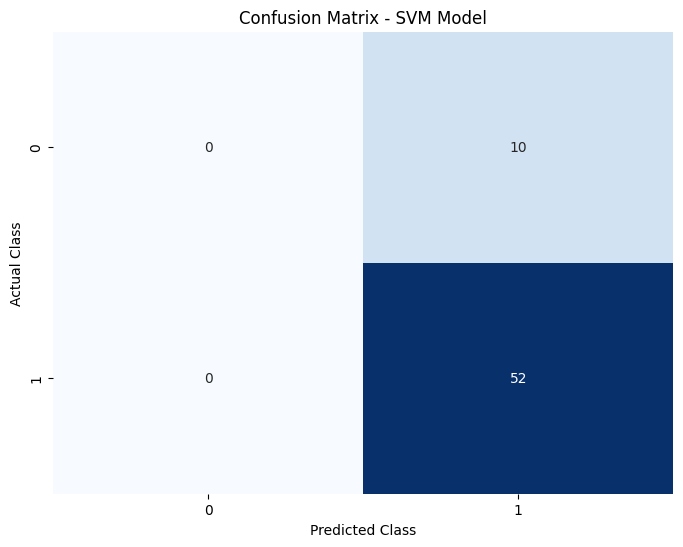

In [ ]:
# Plot the confusion matrix as a heatmap
cm = confusion_matrix(Y_test, Y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix - SVM Model')
plt.show()

# Model Accuracy Comparison

Accuracies: [0.9032258064516129, 0.9032258064516129, 0.9193548387096774, 0.8387096774193549]


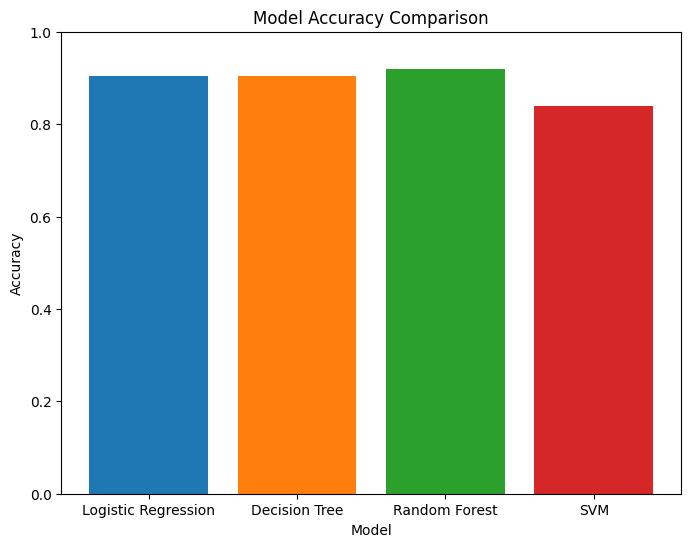

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their corresponding accuracy values
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']
# Update accuracies with the actual accuracy scores
accuracies = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_svm]  # Assuming you have accuracy_dt defined

# Check that all accuracies are valid numbers
print("Accuracies:", accuracies)

# Create a bar chart to visualize the accuracy comparison
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit to 0 to 1 (accuracy range)
plt.savefig('accuracy.jpg')
plt.show()

Random Forest is best model for production due to their high accuracy, balanced precision-recall, and generalization capabilities.



 # Challenges Faced & Solutions

### Challenge 1: Class Imbalance

* Issue: More positive cases than negative cases in the dataset.

* Solution: Considered weighted models and evaluated recall to ensure the minority class is not ignored.

### Challenge 2: Feature Scaling

* Issue: Some models (SVM, Logistic Regression) require scaled data for optimal performance.

* Solution: Applied StandardScaler to normalize features.

### Challenge 3: Model Selection

* Issue: Different models performed well under different conditions.

* Solution: Evaluated accuracy, precision, recall, and F1-score to ensure balanced model selection.

# Conclusion

* Random Forest is the recommended model for lung cancer prediction.

* Future improvements could include hyperparameter tuning and exploring deep learning approaches.

* The model can assist in early detection, potentially improving patient outcomes.

